# DS-SF-34 | 13 | Advanced Metrics | Assignment | Answer Key

## Myopia

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm

from sklearn import preprocessing, linear_model, model_selection, metrics
# TODO model_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In this assignment, we will be looking at what contributes to myopia (i.e., nearsightedness) the most.  My parents always told me not to watch TV or play video game as it will affect negatively my vision.  (They were strangely fine with studying!).  But we are data scientists now, so let's go and explain myopia!

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-13-myopia.csv'))

In [3]:
df

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,...,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,...,0,10,34,1,1
1,2,1995,0,6,1,...,1,7,12,1,1
2,3,1991,0,6,1,...,0,10,14,0,0
3,4,1990,1,6,1,...,0,4,37,0,1
4,5,1995,0,5,0,...,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
613,614,1995,1,6,0,...,3,14,37,1,0
614,615,1993,0,6,1,...,0,8,10,1,1
615,616,1995,0,6,0,...,0,4,4,1,1
616,617,1991,0,6,1,...,0,15,23,0,0


Here's the data dictionnary for this dataset:

| Variable Name | Variable Description | Values/Labels |
|:---|:---|:---|
| `ID` | Subject identifier | Integer (range 1-1503) |
| `STUDYYEAR` | Year subject entered the study | Year |
| `MYOPIC` | Myopia within the first 5 yr of follow up<sup>(a)</sup> | `0 = No`, `1 = Yes` |
| `AGE` | Age at first visit | Years |
| `GENDER` | Gender | `0 = Male`, `1 = Female` |
| `SPHEQ` | Spherical equivalent refraction<sup>(b)</sup> | Diopter |
| `AL` | Axial length<sup>(c)</sup> | mm |
| `ACD` | Anterior chamber depth<sup>(d)</sup> | mm |
| `LT` | Lens thickness<sup>(e)</sup> | mm |
| `VCD` | Vitreous chamber depth<sup>(f)</sup> | mm |
| `SPORTHR` | How many hours per week outside of school the child spent engaging in sports/outdoor activities | Hours per week |
| `READHR` | How many hours per week outside of school the child spent reading for pleasure | Hours per week |
| `COMPHR` | How many hours per week outside of school the child spent playing video/computer games or working on the computer | Hours per week |
| `STUDYHR` | How many hours per week outside of school the child spent reading or studying for school assignments | Hours per week |
| `TVHR` | How many hours per week outside of school the child spent watching television | Hours per week |
| `DIOPTERHR` | Composite of near-work activities | Hours per week  |
| `MOMMY` | Was the subject's mother myopic?<sup>g</sup> | `0 = No`, `1 = Yes` |
| `DADMY` | Was the subject's father myopic? | `0 = No`, `1 = Yes` |
<sup>(a)</sup> MYOPIC is defined as SPHEQ <= -0.75D<br>
<sup>(b)</sup> A measure of the eye's effective focusing power.  Eyes that are "normal" (don't require glasses or contact lenses) have spherical equivalents between -0.25 diopters (D) and +1.00 D. The more negative the spherical equivalent, the more myopic the subject<br>
<sup>(c)</sup> The length of eye from front to back<br>
<sup>(d)</sup> The length from front to back of the aqueous-containing space of the eye between the cornea and the iris<br>
<sup>(e)</sup> The length from front to back of the crystalline lens<br>
<sup>(f)</sup> The length from front to back of the aqueous-containing space of the eye in front of the retina<br>
<sup>(g)</sup> DIOPTERHR = 3 * (READHR + STUDYHR) + 2 * COMPHR + TVHR

> ### Question 1.  `ID` and `STUDYYEAR` do not predict myopia.  Disregard them.  Then, consider two types of inputs.  First, all general inputs (i.e., physical and external inputs) as `X1`.  Second, only the external inputs as `X2`.  Finally, define the response vector `c`

In [4]:
X1 = df[ ['AGE',
    'GENDER',
    'SPHEQ',
    'AL',
    'ACD',
    'LT',
    'VCD',
    'SPORTHR',
    'READHR',
    'COMPHR',
    'STUDYHR',
    'TVHR',
    'DIOPTERHR',
    'MOMMY',
    'DADMY'] ]

X2 = df[ ['AGE',
    'GENDER',
    'SPORTHR',
    'READHR',
    'COMPHR',
    'STUDYHR',
    'TVHR',
    'MOMMY',
    'DADMY'] ]

c = df.MYOPIC

> ### Question 2.  Run your regression line on `X1` and interpret the `MOMMY` and `DADMY` coefficients

In [5]:
model = linear_model.LogisticRegression().fit(X1, c)

print model.intercept_
print zip(X1.columns, model.coef_[0])

[ 0.0525376]
[('AGE', 0.003790199733352572), ('GENDER', 0.5362512219703558), ('SPHEQ', -3.394254272664524), ('AL', 0.11608689499367995), ('ACD', 0.77257197425774238), ('LT', -0.3120202236690367), ('VCD', -0.32603699176050915), ('SPORTHR', -0.047395192919106363), ('READHR', 0.097641789928671119), ('COMPHR', 0.050158468712371063), ('STUDYHR', -0.13224775101398473), ('TVHR', -0.0043863619614795029), ('DIOPTERHR', -0.0078873077939933013), ('MOMMY', 0.6389959285298199), ('DADMY', 0.72678877441615386)]


Answer: It seems that genetics affects myopia significantly.  Odds of Myopia increases 63% and 73% with positive case of myopia for mothers and fathers respectively.  We should further check the model's p-values.

> ### Question 3.  What's the model accuracy?

In [6]:
model.score(X1, c)

0.89320388349514568

Answer: ~89%

> ### Question 3.  Use a 5-fold cross-validation to measure the model's accuracy

In [7]:
model_selection.cross_val_score(model, X1 , c, cv = 5).mean()

0.88023592971413578

Answer: ~88%

> ### Question 4.  In the dataset, what's the percentage of myopic cases?

In [8]:
df.MYOPIC.mean()

0.13106796116504854

Answer: ~13%

> ### Question 5.  Based on the result above, is your model's accuracy good?

In [9]:
1 - model_selection.cross_val_score(model, X1 , c, cv = 5).mean()

0.11976407028586422

Answer: It isn't too impressive: If you were to predict that no one was myopic, your misclassification rate would be 13.1%.  with your current model your error is 12.0%.

> ### Question 6.  Build a confusion matrix

In [10]:
c_hat = model.predict(X1)

pd.crosstab(c,
    c_hat,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0,524,13
1,53,28


> ### Question 7.  What's the model `FPR` and `FNR` (i.e., type I and type II error rates)?

The false positive rate is the proportion of all negatives that still yield positive test outcomes, i.e., the conditional probability of a positive test result given an event that was not present.

In [11]:
fp = ((c_hat == 1) & (c == 0)).sum()
n = (c == 0).sum()
fpr = 1. * fp / n

print fp
print fpr

13
0.024208566108


Complementarily, the false negative rate is the proportion of positives which yield negative test outcomes with the test, i.e., the conditional probability of a negative test result given that the condition being looked for is present.

In [12]:
fn = ((c_hat == 0) & (c == 1)).sum()
p = (c == 1).sum()
fnr = 1. * fn / p

print fn
print fnr

53
0.654320987654


Answer: FPR ~ 2.4%, FNR ~ 65%

> ### Question 8.  What's the trade-off between these two errors?

In [13]:
p_hat = pd.Series(model.predict_proba(X1).T[1])

def fpr(p):
    c_hat = (p_hat >= p)
    fp = ((c_hat == 1) & (c == 0)).sum()
    n = (c == 0).sum()
    return 1. * fp / n

def fnr(p):
    c_hat = (p_hat >= p)
    fn = ((c_hat == 0) & (c == 1)).sum()
    p = (c == 1).sum()
    return 1. * fn / p

fpnrs = pd.DataFrame({'threshold': p_hat,
        'fpr': p_hat.apply(fpr),
        'fnr': p_hat.apply(fnr)},
    columns = ['threshold', 'fpr', 'fnr']).\
    sort_values(by = 'threshold')

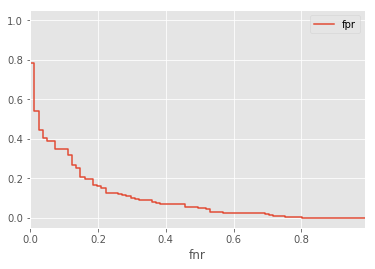

In [14]:
fpnrs.plot(x = 'fnr', y = 'fpr')

Answer: You cannot reduce both errors at the same time.  If you want to reduce the type I error, you'll need to allow for a later type II error and vice versa.

> ### Question 9.  Run your regression line on `X2` and interpret your results specifically on `SPORTHR`, `READHR`, `COMPHR`, `STUDYHR`, `TVHR`, and `GENDER`.  You might want to use `statsmodels`' `Logit()`

In [15]:
sm.Logit(c, sm.add_constant(X2)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.354054
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 MYOPIC   No. Observations:                  618
Model:                          Logit   Df Residuals:                      608
Method:                           MLE   Df Model:                            9
Date:                                   Pseudo R-squ.:                 0.08846
Time:                                   Log-Likelihood:                -218.81
converged:                       True   LL-Null:                       -240.04
                                        LLR p-value:                 2.700e-06
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -4.7493      1.287     -3.689      0.000        -7.273    -2.226
AGE            0.2744      0.193      1.423      0.155        -0.104     0.652
GENDER         0.4241      0.265      1.599      0.110        -0.096     0.944
SPORTHR       -0.0425      0.018     -2.329      0.020        -0.078    -0.007
READHR         0.0941      0.038      2.446      0.014         0.019     0.169
COMPHR         0.0325      0.038      0.854      0.393        -0.042     0.107
STUDYHR       -0.1059      0.074     -1.430      0.153        -0.251     0.039
TVHR           0.0063      0.023      0.271      0.787        -0.039     0.051
MOMMY          0.8701      0.262      3.317      0.001         0.356     1.384
DADMY          1.0250      0.265      3.864      0.000         0.505     1.545
==============================================================================
"""

Answer: We can confirm here that genetics (`MOMMY` and `DADMY`) is indeed significant as well as `SPORTHR` and `READHR`.  On the other hand, `AGE`, `GENDER`, `COMPHR`, `STUDYHR` and `TVHR`.

> ### Question 10.  Now it's time for regularization!  Use `X1`.  According to `Lasso`, what are the non-significant features?

In [16]:
scaler = preprocessing.MinMaxScaler().fit(X1)

X1 = pd.DataFrame(scaler.transform(X1), columns = X1.columns)

In [17]:
gs = model_selection.GridSearchCV(
    estimator = linear_model.LogisticRegression(),
    param_grid = {'C': np.logspace(-10, 10, 21), 'penalty': ['l1']},
    cv = model_selection.KFold(n_splits = 5, shuffle = True, random_state = 0)
)

gs.fit(X1, c)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1'], 'C': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [18]:
gs.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [19]:
gs.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
model = gs.best_estimator_.fit(X1, c)

In [21]:
print model.intercept_
print zip(X1.columns, model.coef_[0])

[ 0.09516202]
[('AGE', 0.0), ('GENDER', 0.55984743806753257), ('SPHEQ', -14.483761821087858), ('AL', 0.0), ('ACD', 1.2023513467007474), ('LT', 0.0), ('VCD', 0.0), ('SPORTHR', -1.2089795061225015), ('READHR', 0.53128025051347649), ('COMPHR', 0.0), ('STUDYHR', -0.58971299010493394), ('TVHR', 0.0), ('DIOPTERHR', 0.0), ('MOMMY', 0.66144338387028723), ('DADMY', 0.80283814394090336)]


Answer: `AGE`, `AL`, `LT`, `VCD`, `COMPHR`, `TVHR`, and `DIOPTERHR`.

> ### Question 11.  What is your conclusions about your parents' claims?

Answer:  They are simply wrong based on our data. `COMPHR` and `TVHR` have minimal effect on chance of myopia while genetics and gender significantly increased the odds of myopia.  To our surprise `SPORTHR` and `STUDYHR` seem to decrease the odds of myopia.  This might only be correct in our dataset as it is composed of children under 10.  Maybe those who have eyesight issues do not have that much incentive to involve in sports or may have difficulty studying.

> ### Question 12.  Draw the ROC curve of your best tuned model

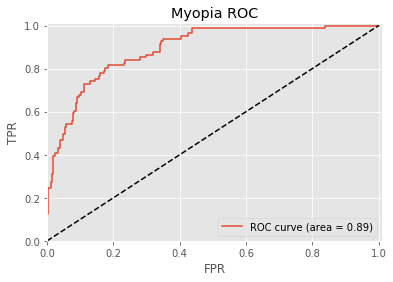

In [22]:
p_hat = model.predict_proba(X1).T[1]

fpr, tpr, thresholds = metrics.roc_curve(c, p_hat)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("Myopia ROC")
plt.legend(loc = 'lower right')